In [8]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from prophet import Prophet

In [46]:
df = pd.read_csv('final data.csv')

In [47]:
df

,time,temperature_2m (°C),apparent_temperature (°C),surface_pressure (hPa),precipitation (mm),rain (mm),cloudcover (%),windspeed_10m (km/h),winddirection_10m (°),city
0,2013-01-01T00:00,22.9,18.8,955.7,0.0,0.0,0.0,15.0,27.0,Abuja
1,2013-01-01T01:00,22.3,18.3,955.4,0.0,0.0,0.0,14.3,28.0,Abuja
2,2013-01-01T02:00,21.8,17.8,954.8,0.0,0.0,0.0,13.7,30.0,Abuja
3,2013-01-01T03:00,21.4,17.5,954.4,0.0,0.0,0.0,13.3,33.0,Abuja
4,2013-01-01T04:00,21.0,17.0,954.0,0.0,0.0,0.0,13.2,35.0,Abuja
...,...,...,...,...,...,...,...,...,...,...
364127,2023-05-21T20:00,27.5,31.5,1009.6,0.0,0.0,47.0,16.4,213.0,Lagos
364128,2023-05-21T21:00,27.4,31.5,1010.5,0.0,0.0,47.0,15.1,220.0,Lagos
364129,2023-05-21T22:00,27.2,31.7,1011.3,0.0,0.0,51.0,13.2,227.0,Lagos
364130,2023-05-21T23:00,27.1,32.4,1012.1,0.0,0.0,49.0,7.4,223.0,Lagos


In [48]:
df['time'] = pd.to_datetime(df['time'], format='%Y-%m-%d')

In [49]:
#filtering for each city
lag = df[df['city'] == 'Lagos']
keffi = df[df['city'] == 'Keffi']
minna = df[df['city'] == 'Minna']
abj = df[df['city'] == 'Abuja']

In [50]:
df.set_index(df['time'], inplace=True)

In [52]:
from statsmodels.tsa.stattools import adfuller
#function to check stationarity using Augmented Dickey fuller test for all cities
def adfuller_stats(x, title= ''):
  ADF = adfuller(x, autolag='AIC')
  print(f'ADF statistics for {title}: {ADF[0]}')
  print(f'p-Value: {ADF[1]}')
  for key, value in ADF[4].items():
    print('critical values: ')
    print(f'    {key},  {value}')
  print('\n')

In [53]:
#stationarity test for temperature
for i, j in enumerate(lis):
  adfuller_stats(j['apparent_temperature (°C)'], title=f'currency {i + 1}')

ADF statistics for currency 1: -8.440994907788196
p-Value: 1.7634214684040494e-13
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 2: -10.072555276833045
p-Value: 1.2478596863584713e-17
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 3: -9.15088944126697
p-Value: 2.688524085474128e-15
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 4: -10.243404778324567
p-Value: 4.685023233176048e-18
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669




In [54]:
#stationarity test for pressure
for i, j in enumerate(lis):
  adfuller_stats(j['surface_pressure (hPa)'], title=f'currency {i + 1}')

ADF statistics for currency 1: -9.967728674754408
p-Value: 2.2833262351455156e-17
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 2: -11.394235914371638
p-Value: 7.930318793769229e-21
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 3: -11.099819639030292
p-Value: 3.890595847389248e-20
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 4: -12.04506488893869
p-Value: 2.6767691733949577e-22
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669




In [55]:
#stationarity test for rain
for i, j in enumerate(lis):
  adfuller_stats(j['rain (mm)'], title=f'currency {i + 1}')

ADF statistics for currency 1: -29.79642209980998
p-Value: 0.0
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 2: -27.493868297667817
p-Value: 0.0
critical values: 
    1%,  -3.43042188616612
critical values: 
    5%,  -2.861571772524433
critical values: 
    10%,  -2.5667869114090176


ADF statistics for currency 3: -26.122806222342838
p-Value: 0.0
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669


ADF statistics for currency 4: -25.891622742063372
p-Value: 0.0
critical values: 
    1%,  -3.430421889327222
critical values: 
    5%,  -2.861571773921572
critical values: 
    10%,  -2.566786912152669




In [37]:
df = df.resample('Y').mean()

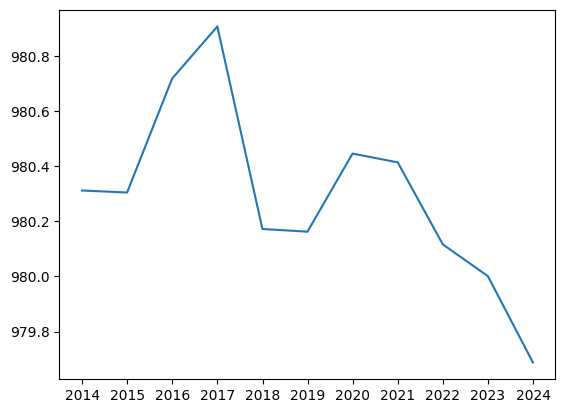

In [40]:
#plt.plot(df['temperature_2m (°C)'])
plt.plot(df['surface_pressure (hPa)'])

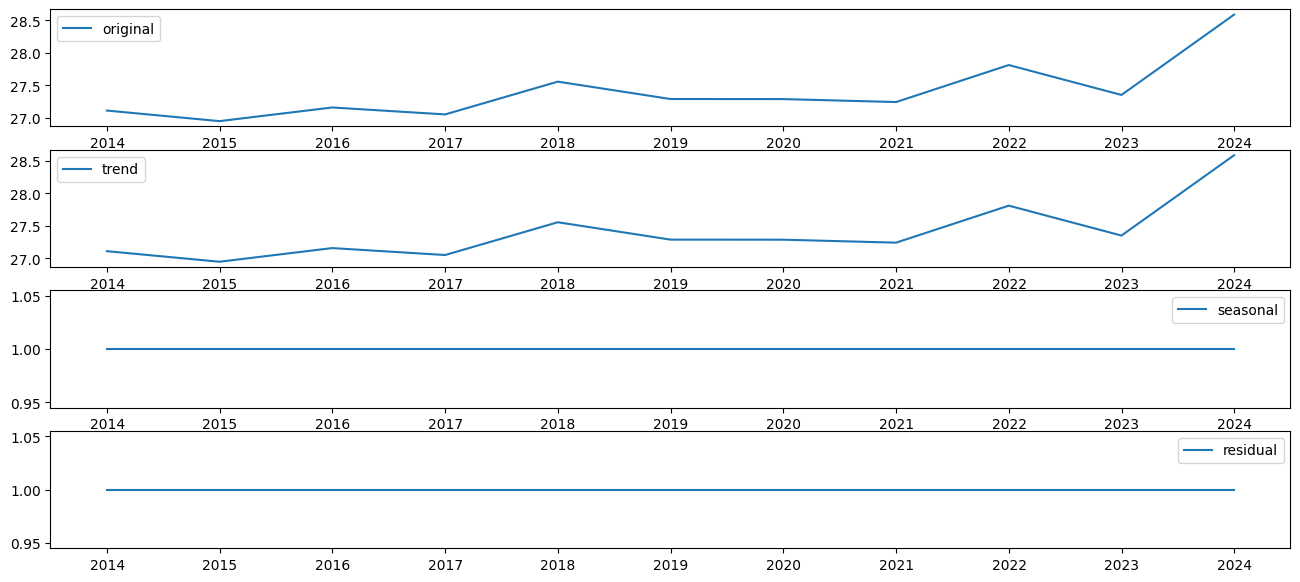

In [44]:
#decompose data using aadditive model with 1 period or frequency
from statsmodels.tsa.seasonal import seasonal_decompose
dec = seasonal_decompose(df['temperature_2m (°C)'], period=1, model='multiplication')
trend = dec.trend
season = dec.seasonal
residual = dec.resid

plt.figure(figsize=(16,7))
plt.subplot(411)
plt.plot(df['temperature_2m (°C)'], label='original')
plt.legend(loc='best')

plt.subplot(412)
plt.plot(trend, label='trend')
plt.legend(loc='best')

plt.subplot(413)
plt.plot(season, label='seasonal')
plt.legend(loc='best')

plt.subplot(414)
plt.plot(residual, label='residual')
plt.legend(loc='best')